# Synthetic Example

In [2]:
exec(open('ComputeDelays.py').read())
import matplotlib.pyplot as plt
#This is just to set the default figure parameters to smarter values for me, you can change them or remove/not run this cell
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams['figure.figsize'] = (14.0, 4.0)

GS_4=timedata('GS_4')
readlabdat('jun27_2.csv',GS_4)

#time = np.arange(0,4*np.pi,0.1)   # start,stop,step
time = GS_4.time
f = 250000 # Hz
y = np.sin(2*np.pi*f*time)
yy = np.sin(np.pi*f*time)

Text(0.5, 1.0, 'Synthetic Data: y=sin(2$\\pi$ft)')

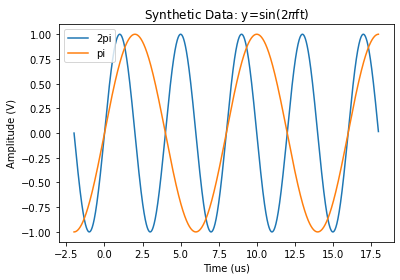

In [354]:
plt.plot(time*1e6,y, label='2pi')
plt.plot(time*1e6,yy, label='pi')
plt.legend()
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (V)')
plt.title('Synthetic Data: y=sin(2$\pi$ft)')

In [357]:
# FFT

n_=np.size(time)
dt_=(time[2]-time[1])*1e6
f_=np.fft.fftshift(np.fft.fftfreq(n_,d=dt_))*1000
#FT_=np.fft.fftshift(np.fft.fft(y))
FT_=np.fft.fftshift(np.fft.fft(y - np.mean(y)))

Text(0.5, 1.0, 'FFT of y=sin(2$\\pi$ft)')

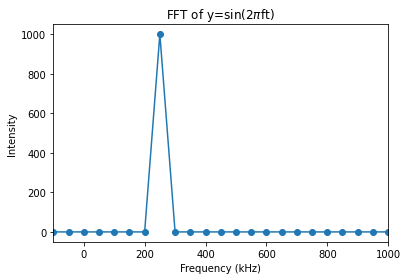

In [358]:
plt.plot(f_,np.abs(FT_),'-o', label="")
plt.xlim([-100,1000])
#plt.legend()
plt.xlabel('Frequency (kHz)')
plt.ylabel('Intensity')
plt.title('FFT of y=sin(2$\pi$ft)')

In [359]:
# Frequency at peak (kHz):
f_[np.argmax(np.abs(FT_))]

-250.0000000000024

Text(0.5, 1.0, 'Synthetic Data - Padded')

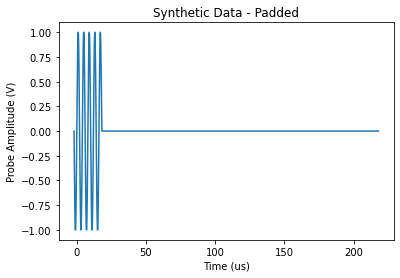

In [208]:
# Padding

zero_num = 20000   # number of zero points we want to add
y_pad = np.pad(y,zero_num) # np.pad adds zero to both ends
y_pad = y_pad[zero_num:len(y_pad)]   # cut the leading zeros

dx = time[2]-time[1]   # dt, spacing between time points
newtimes = np.zeros(zero_num)
for i in range(1,zero_num + 1):      # extend time array to accomodate padding
    newtimes[i-1]= time[len(time)-1] + i*dx

time_pad = np.append(time,newtimes)

plt.plot(time_pad*1e6,y_pad)
plt.xlabel('Time (us)')
plt.ylabel('Probe Amplitude (V)')
plt.title('Synthetic Data - Padded')

In [209]:
# FFT of synthetic data
n_pad=np.size(time_pad)
dt_pad=(time_pad[2]-time_pad[1])*1e6
f_pad=np.fft.fftshift(np.fft.fftfreq(n_pad,d=dt_pad))*1000
#FT_=np.fft.fftshift(np.fft.fft(y))
FT_pad=np.fft.fftshift(np.fft.fft(y_pad - np.mean(y_pad)))

Text(0.5, 1.0, 'FFT of Padded y=sin(2$\\pi$ft)')

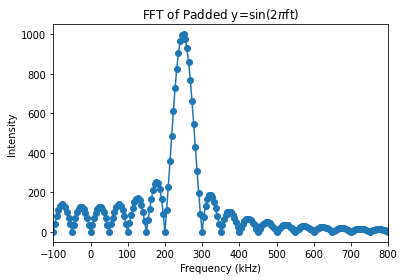

In [210]:
plt.plot(f_pad,np.abs(FT_pad),'-o', label="")
plt.xlim([-100,800])
#plt.legend()
plt.xlabel('Frequency (kHz)')
plt.ylabel('Intensity')
plt.title('FFT of Padded y=sin(2$\pi$ft)')

In [211]:
# Frequency at peak (kHz):
f_pad[np.argmax(np.abs(FT_pad))]

-250.0000000000024

In [344]:
def FFT(file, variable):
    exec(open('ComputeDelays.py').read())

    variable=timedata(variable)
    readlabdat(file,variable)

    return variable


In [349]:
GS = FFT('jun10_8.csv', 'GS')

In [350]:
GS.time

array([-5.000e-05, -4.995e-05, -4.990e-05, ...,  4.985e-05,  4.990e-05,
        4.995e-05])

In [351]:
GS.data

array([-1.1023869e-04, -3.2897460e-05, -3.1580540e-05, ...,
       -9.6237992e-04, -9.3496406e-04, -8.8974245e-04])

# Synthetic Data and Time

Text(0.5, 1.0, 'Synthetic Data: y=sin(2$\\pi$ft)')

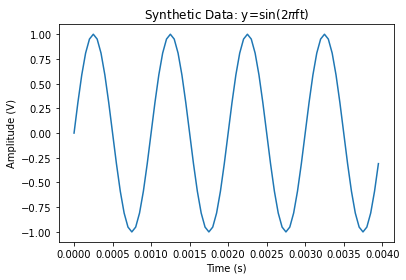

In [399]:
# Input Variables:
f = 1000  # frequency, Hz
n = 4       # number of cycles
ppc = 20     # number of points per cycle

# Ouput:
w = 2*np.pi*f # angular frequency, Hz
T = 1/f       # period, s
stop = n*T    # calculates time range for n cycles
step = T/ppc
time = np.arange(0,n*T,step) # start,stop,step
y = np.sin(2*np.pi*f*time)

plt.plot(time,y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.title('Synthetic Data: y=sin(2$\pi$ft)')

Text(0.5, 1.0, 'Synthetic Data - Padded')

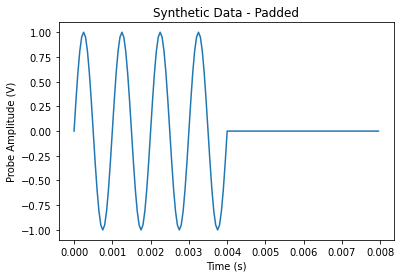

In [400]:
# Pad synthetic data

#zero_num = 100   # number of zero points we want to add
zero_num = ppc*n
y_pad = np.pad(y,zero_num) # np.pad adds zero to both ends
y_pad = y_pad[zero_num:len(y_pad)]   # cut the leading zeros

newtimes = np.zeros(zero_num)
for i in range(1,zero_num + 1):      # extend time array to accomodate padding
    newtimes[i-1]= time[len(time)-1] + i*step

time_pad = np.append(time,newtimes)

plt.plot(time_pad,y_pad)
plt.xlabel('Time (s)')
plt.ylabel('Probe Amplitude (V)')
plt.title('Synthetic Data - Padded')

Text(0.5, 1.0, 'FFT of y=sin(2$\\pi$ft)')

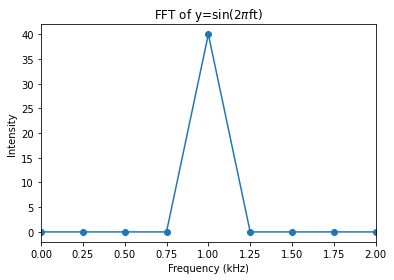

In [402]:
# FFT of unpadded
n_=np.size(time)
dt_=(time[2]-time[1])
f_=np.fft.fftshift(np.fft.fftfreq(n_,d=dt_))
#FT_=np.fft.fftshift(np.fft.fft(y))
FT_=np.fft.fftshift(np.fft.fft(y - np.mean(y)))

plt.plot(f_/1000,np.abs(FT_),'-o', label="")
plt.xlim([0,2])
#plt.legend()
plt.xlabel('Frequency (kHz)')
plt.ylabel('Intensity')
plt.title('FFT of y=sin(2$\pi$ft)')

In [403]:
# Frequency at peak (Hz):
f_[np.argmax(np.abs(FT_))]

-1000.0

In [404]:
# Frequency spacing, df (Hz):
(f_[2]-f_[1])

250.0

Text(0.5, 1.0, 'With padding, FFT of y=sin(2$\\pi$ft)')

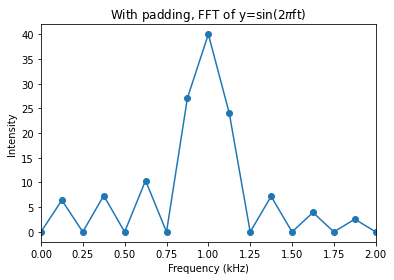

In [407]:
# FFT of Padded
n_pad=np.size(time_pad)
dt_pad=(time_pad[2]-time_pad[1])
f_pad=np.fft.fftshift(np.fft.fftfreq(n_pad,d=dt_pad))
#FT_=np.fft.fftshift(np.fft.fft(y_pad))
FT_pad=np.fft.fftshift(np.fft.fft(y_pad - np.mean(y_pad)))

plt.plot(f_pad/1000,np.abs(FT_pad),'-o', label="")
plt.xlim([0,2])
#plt.legend()
plt.xlabel('Frequency (kHz)')
plt.ylabel('Intensity')
plt.title('With padding, FFT of y=sin(2$\pi$ft)')

In [326]:
# Frequency at peak (Hz):
f_pad[np.argmax(np.abs(FT_pad))]

1000.0

In [327]:
# Frequency spacing, df (Hz):
(f_pad[2]-f_pad[1])

166.66666666666697

# What decides peak width?

In [319]:
# What decides peak width?

# Padding does NOT change peak width
# 500 Hz is width for: f = 1000 Hz, n=4, ppc=3
# 1000 Hz is width for: f = 2000 Hz, n=4, ppc=3
# 1500 Hz is width for: f = 3000 Hz, n=4, ppc=3
# peak width is proportional to input frequency, (width = f/2)?

# peak width does NOT change with ppc
# 500 Hz is width for: f = 1000 Hz, n=4, ppc=3
# 500 Hz is width for: f = 1000 Hz, n=4, ppc=10
# peak width DOES change with n
# 200 Hz is width for: f = 1000 Hz, n=10, ppc=3
# 200 Hz is width for: f = 1000 Hz, n=10, ppc=10

# peak width is inversely proportional to n, (width = 2f/n)?
# 2000 Hz is width for: f = 1000 Hz, n=1, ppc=10
# 1000 Hz is width for: f = 1000 Hz, n=2, ppc=10
# 666.67 Hz is width for: f = 1000 Hz, n=3, ppc=10

# width = 2f/n

In [ ]:
# To minimize peak width (freq shift resolution) we should minimize input freq and maximize number of cycles

In [332]:
# We initially theorized that peaks were broadening as f increased because of poorer sampling (higher frequency waves would be saved
# with less points per cycle than lower freqency waves, due to our 2000 points restraint). To test this theory, I made a synthetic example
# and I controlled the number of data points per cycle, as well as the number of cycles. After some trial and error, I came to the following 
# conclusions:

# the base width of an FFT peak is 2f/n
# peak width is not affected by padding (therefore, also not affected by total time)
# peak width is not affected by the number of points per cycle

# This explains the peak broadening we were seeing (ex. TofuFFT_4cycles.jpg ) that we originally attributed to sampling inconsistency. 

# check if this formula is previously known

Text(0.5, 1.0, 'Synthetic Data: y=sin(2$\\pi$ft)')

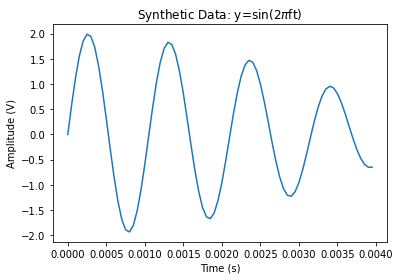

In [413]:
# Combine two signals and see if they can be resolved in FFT space

# Input Variables:
f = 1000  # frequency, Hz
n = 4       # number of cycles
ppc = 20     # number of points per cycle

# Ouput:
w = 2*np.pi*f # angular frequency, Hz
T = 1/f       # period, s
stop = n*T    # calculates time range for n cycles
step = T/ppc
time = np.arange(0,n*T,step) # start,stop,step
y = np.sin(w*time) + np.sin(2*np.pi*900*time)

plt.plot(time,y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.title('Synthetic Data: y=sin(2$\pi$ft)')

Text(0.5, 1.0, '1000 Hz + 900 Hz, n = 4')

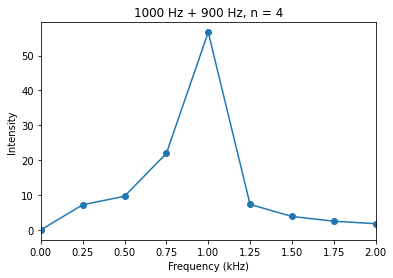

In [415]:
n_=np.size(time)
dt_=(time[2]-time[1])
f_=np.fft.fftshift(np.fft.fftfreq(n_,d=dt_))
#FT_=np.fft.fftshift(np.fft.fft(y))
FT_=np.fft.fftshift(np.fft.fft(y - np.mean(y)))

plt.plot(f_/1000,np.abs(FT_),'-o', label="")
plt.xlim([0,2])
#plt.legend()
plt.xlabel('Frequency (kHz)')
plt.ylabel('Intensity')
plt.title('1000 Hz + 900 Hz, n = 4')

In [385]:
# see above, when two signals are added together, the freqiencies are not resolved when n = 4, but after increasing n to 40 the two frequencies 
# clearly resolved in the FFT. So, peak width IS limiting the resolution!

In [392]:
# Input Variables:
f = 80000  # frequency, Hz
n = 4       # number of cycles
ppc = 20     # number of points per cycle

# Ouput:
w = 2*np.pi*f # angular frequency, Hz
T = 1/f       # period, s
stop = n*T    # calculates time range for n cycles
step = T/ppc
time = np.arange(0,n*T,step) # start,stop,step
y = np.sin(2*np.pi*f*time)

# FFT of unpadded
n_=np.size(time)
dt_=(time[2]-time[1])
f_=np.fft.fftshift(np.fft.fftfreq(n_,d=dt_))
#FT_=np.fft.fftshift(np.fft.fft(y))
FT_=np.fft.fftshift(np.fft.fft(y - np.mean(y)))




In [387]:
f_100 = f_
FT_100 = FT_

In [389]:
f_300 = f_
FT_300 = FT_

In [391]:
f_500 = f_
FT_500 = FT_

In [393]:
f_800 = f_
FT_800 = FT_

In [3]:
plt.plot(f_100/100,np.abs(FT_100),'-o', label="100 kHz")
plt.plot(f_300/100,np.abs(FT_300),'-o', label="300 kHz")
plt.plot(f_500/100,np.abs(FT_500),'-o', label="500 kHz")
plt.plot(f_800/100,np.abs(FT_800),'-o', label="800 kHz")

plt.xlim([0,1000])
plt.legend()
plt.xlabel('Frequency (kHz)')
plt.ylabel('Intensity')
plt.title('FFT of y=sin(2$\pi$ft), n=4, ppc=20')

NameError: name 'f_100' is not defined

Sept 7 - After Meeting: Check total time and % of useful data ratio

Text(0.5, 1.0, 'Synthetic Data: y=sin(2$\\pi$ft)')

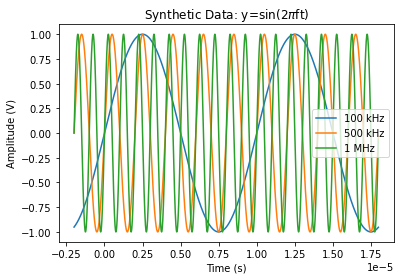

In [4]:
f1 = 100000 # 100 kHz
f2 = 500000 # 500 kHz
f3 = 1000000 # 1 MHz
time = GS_4.time

y1 = np.sin(2*np.pi*f1*time)
y2 = np.sin(2*np.pi*f2*time)
y3 = np.sin(2*np.pi*f3*time)

plt.plot(time,y1, label="100 kHz" )
plt.plot(time,y2, label="500 kHz")
plt.plot(time,y3, label="1 MHz")
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.title('Synthetic Data: y=sin(2$\pi$ft)')

Text(0.5, 1.0, 'FFT of y=sin(2$\\pi$ft), n=4, ppc=20')

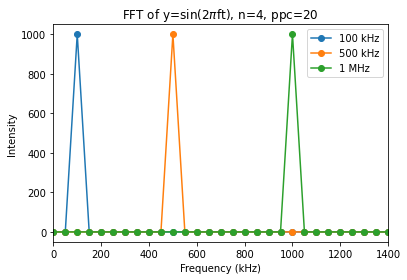

In [5]:
# FFT of unpadded
n_1=np.size(time)
dt_1=(time[2]-time[1])
f_1=np.fft.fftshift(np.fft.fftfreq(n_1,d=dt_1))
#FT_=np.fft.fftshift(np.fft.fft(y))
FT_1=np.fft.fftshift(np.fft.fft(y1 - np.mean(y1)))

n_2=np.size(time)
dt_2=(time[2]-time[1])
f_2=np.fft.fftshift(np.fft.fftfreq(n_2,d=dt_2))
#FT_=np.fft.fftshift(np.fft.fft(y))
FT_2=np.fft.fftshift(np.fft.fft(y2 - np.mean(y2)))

n_3=np.size(time)
dt_3=(time[2]-time[1])
f_3=np.fft.fftshift(np.fft.fftfreq(n_3,d=dt_3))
#FT_=np.fft.fftshift(np.fft.fft(y))
FT_3=np.fft.fftshift(np.fft.fft(y3 - np.mean(y3)))

plt.plot(f_1/1000,np.abs(FT_1),'-o', label="100 kHz")
plt.plot(f_2/1000,np.abs(FT_2),'-o', label="500 kHz")
plt.plot(f_3/1000,np.abs(FT_3),'-o', label="1 MHz")

plt.xlim([0,1400])
plt.legend()
plt.xlabel('Frequency (kHz)')
plt.ylabel('Intensity')
plt.title('FFT of y=sin(2$\pi$ft), n=4, ppc=20')

In [ ]:
time = GS_4.time
data = GS_4.data

zero_num = len(time)
y_pad = np.pad(y,zero_num)          # np.pad adds zero to both ends
y_pad = y_pad[zero_num:len(y_pad)]  # cut the leading zeros

newtimes = np.zeros(zero_num)
for i in range(1,zero_num + 1):     # extend time array to accomodate padding
    newtimes[i-1]= time[len(time)-1] + i*step

time_pad = np.append(time,newtimes)

plt.plot(time_pad,y_pad)

plt.xlabel('Time (s)')
plt.ylabel('Probe Amplitude (V)')
plt.title('Synthetic Data - Padded')

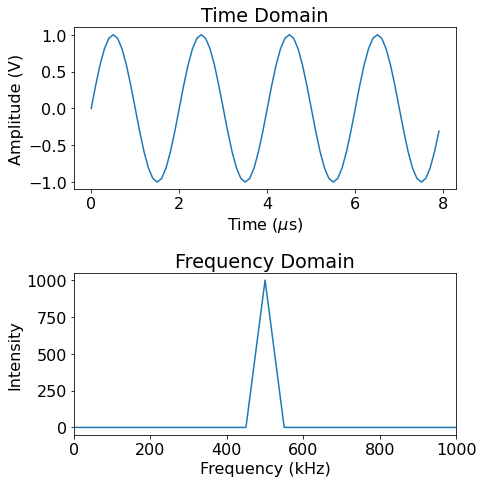

In [31]:
# Input Variables:
f = 500000  # frequency, Hz
n = 4       # number of cycles
ppc = 20     # number of points per cycle

# Ouput:
w = 2*np.pi*f # angular frequency, Hz
T = 1/f       # period, s
stop = n*T    # calculates time range for n cycles
step = T/ppc
time = np.arange(0,n*T,step) # start,stop,step
y = np.sin(2*np.pi*f*time)


fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

# plot time signal:
axs[0].set_title("Time Domain")
axs[0].plot(time*1e6,y, label ="300kHz")
axs[0].set_xlabel("Time ($\mu$s)")
axs[0].set_ylabel("Amplitude (V)")
#axs[0].legend(loc='best')

axs[1].set_title("Frequency Domain")
axs[1].plot(f_2/1000,np.abs(FT_2), label="500 kHz")
axs[1].set_xlabel("Frequency (kHz)")
axs[1].set_ylabel("Intensity")
axs[1].set_xlim([0, 1000])
#axs[1].legend(loc='best')
fig.tight_layout()

plt.savefig('timetofreq.jpg', dpi=400)

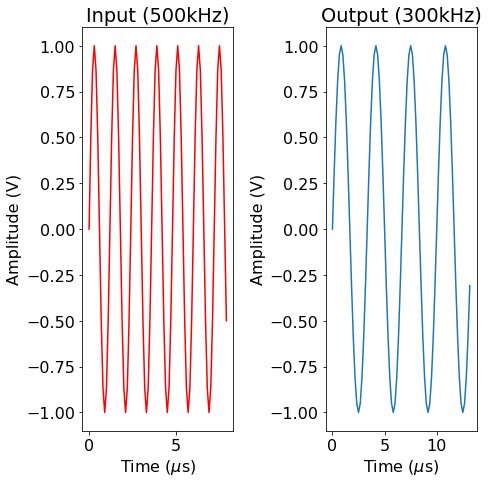

In [28]:
# Input Variables:
f = 500000  # frequency, Hz
n = 4       # number of cycles
ppc = 20     # number of points per cycle

# Ouput:
w = 2*np.pi*f # angular frequency, Hz
T = 1/f       # period, s
stop = n*T    # calculates time range for n cycles
step = T/ppc
time2 = np.arange(0,n*T,step) # start,stop,step
y2 = np.sin(2*np.pi*f*time)


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(7, 7))

# plot time signal:
axs[0].set_title("Input (500kHz)")
axs[0].plot(time2*1e6,y2, 'r', label ="300kHz")
axs[0].set_xlabel("Time ($\mu$s)")
axs[0].set_ylabel("Amplitude (V)")
#axs[0].legend(loc='best')

axs[1].set_title("Output (300kHz)")
axs[1].plot(time*1e6,y, label ="300kHz")
axs[1].set_xlabel("Time ($\mu$s)")
axs[1].set_ylabel("Amplitude (V)")
fig.tight_layout()

plt.savefig('problem_plot2.jpg', dpi=400)